# Denoising Diffusion Probabilistic Models
## Cognitive Computing and Artificial Intelligence, 2021/22, Final Project
### Amenta Daniele, D'Agosta Daniele

---

Initially we proceed with the connection with *Google Drive*, in which in the `cifar10` folder there must be a portion of the dataset to be used for learning the model. 

We also proceed to the creation (*if not present*) of the folder `Colab Notebooks/DenosingDiffusionModel/` in which the learning **results** of the model will be logged.

In [ ]:
#setting path in Colab
#mount the drive first
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
import os

#set the working directory 
root_dir = "/content/drive/My Drive/"

#choose the project folder
project_folder = "Colab Notebooks/DenoisingDiffusionModel/"

#define a function to create and set the working directory
def create_and_set_working_directory(project_folder):
  #check if the project folder exists. if not, make one.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + 'did not existed and was created.')
  
  #change the OS path to project folder as working directory
  os.chdir(root_dir + project_folder)

In [ ]:
create_and_set_working_directory(project_folder)

Now let's proceed to the clone of the repository mentioned in the paper.

In [ ]:
!git clone https://github.com/lucidrains/denoising-diffusion-
!pip install denoising_diffusion_pytorch

Cloning into 'denoising-diffusion-'...
fatal: could not read Username for 'https://github.com': No such device or address
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-678c030f-5d7a-6869-dd91-1110e26d03f4)


In this part the **diffusion model** to be used is defined and it is possible to choose parameters such as `image_size`, `timesteps` and `loss function`, where with `l1` indicates the ***MAE*** and with `l2` indicates the ***MSE***.

In [ ]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(dev)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

diffusion.to(dev)

GaussianDiffusion(
  (denoise_fn): Unet(
    (init_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (time_mlp): Sequential(
      (0): SinusoidalPosEmb()
      (1): Linear(in_features=64, out_features=256, bias=True)
      (2): GELU()
      (3): Linear(in_features=256, out_features=256, bias=True)
    )
    (downs): ModuleList(
      (0): ModuleList(
        (0): ResnetBlock(
          (mlp): Sequential(
            (0): SiLU()
            (1): Linear(in_features=256, out_features=128, bias=True)
          )
          (block1): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
            (act): SiLU()
          )
          (block2): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
            (act): SiLU()
          )
          (res_conv): Identity()
  

We use the `automobile` folder of the **CIFAR10 dataset** available in the aforementioned folder.

In [ ]:
# Define root directory from Google Drive
root_dir = "/content/drive/My Drive/cifar10/cifar10/train/automobile"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we **train our model**. 

In this part we will get as output only the value of the ***loss function***, while in the results directory there will be the data of the generated model and the images when the `save_and_sample_every` value is reached.

The values of the **FID** (*Frèchet Inception Distance*) and the **IS** (*Inception Score*) are instead calculated using an external code, not provided in this Google Colab document to facilitate reading and use.

In [ ]:
trainer = Trainer(
    diffusion,
    root_dir,
    train_batch_size = 32,
    train_lr = 1e-4,
    train_num_steps = 20000,         # total training steps 700000
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.999,                # exponential moving average decay
    save_and_sample_every = 999,
    amp = True                      # turn on mixed precision 
)

trainer.train()

Output streaming troncato alle ultime 5000 righe.
sampling loop time step: 100%|██████████| 1000/1000 [04:33<00:00,  3.65it/s]

sampling loop time step: 100%|██████████| 1000/1000 [04:33<00:00,  3.65it/s]

sampling loop time step: 100%|██████████| 1000/1000 [04:33<00:00,  3.65it/s]

loss: 0.0539:  71%|███████   | 14156/20000 [8:51:15<3:07:32,  1.93s/it]

Any descriptive comment on the obtained results is included in our presentation on the paper, as the Cognitive Computing 2021/22 course's final assignment.

Here the results of different run.
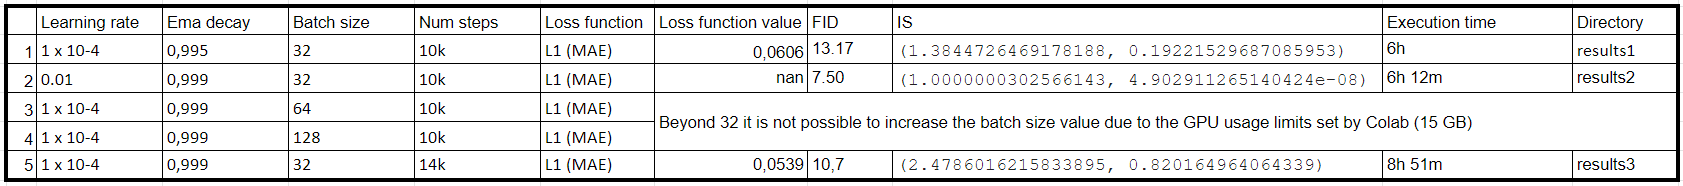
